#案例：假设你是一家餐厅的CEO，正在考虑开一家分店，根据城市的人口数据预测其利润
#我们拥有不同城市对于的人口数据以及利润：ex1data1.txt


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#numpy:科学计算库，处理多维数组，进行数据分析
#pandas：是基于numpy的一种工具，该工具是为了解决数据分析任务而创建的
#Matplotlib：2D绘图库
#matplotilb.pyplot：提供类似matlab的绘图框架
#pandas.read-csv(1.字符串，要读取文件的路径，可放http，ftp，s3，file 2.分隔符，默认为“，” 3.整数，指定第几行作为列名，若没有，默认header=0 4.列名）

In [317]:
#pandas.read-csv(1.字符串，要读取文件的路径，可放http，ftp，s3，file 2.分隔符，默认为“，” 3.整数，指定第几行作为列名，若没有，默认header=0 4.列名）
data = pd.read_csv('ex1data1.txt',names=['population','profit'])
data.head()#预览前五行

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.tail()#看后五个 

,population,profit
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


In [5]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
population    97 non-null float64
profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


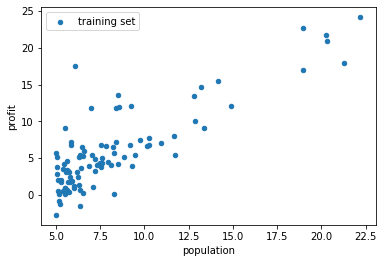

In [8]:
data.plot.scatter('population','profit',label='training set')
plt.show()

In [10]:
#在数据集前面再插入一列
data.insert(0,'ones',1)
data.head()

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [13]:
#数据切片
X = data.iloc[:,0:-1] #[行,列] 全要就是:  区间就是[0,-1) 第一列0 第二列1 ... 最后一列-1
X.head()

,ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [313]:
Y = data.iloc[:,-1]
Y.head()
Y.shape

(97,)

In [33]:
#结构变化：从dataframe（pd）转到ndarray数组
#df.values
#df.as-matrix()
#np.array(df)
X = np.array(X)
X.shape#数组纬度

(97, 2)

In [311]:
Y = np.array(Y)
Y.shape

(97, 1)

In [312]:
Y = Y.reshape(97,1)
Y.shape

(97, 1)

In [56]:
def costFunct(X,Y,theta):
    inner = np.power(X@theta-Y,2)#内部运算结构 @矩阵相乘 
    return np.sum(inner)/(2y*len(X))

In [230]:
theta = np.zeros((2,1))
theta.shape

(2, 1)

In [57]:
cost_init = costFunct(X,Y,theta)
print(cost_init)

32.072733877455676


In [293]:
def gradient(X,Y,theta,alpha,iters):
    costs = []
    for i in range(iters):
        theta = theta - (X.T@(X@theta-Y))*alpha/len(X)
        cost = costFunct(X,Y,theta)
        costs.append(cost)
        
        #if i%100==0:
          #  print(cost)
    
    return theta,costs

In [295]:
theta = np.zeros((2,1))
alpha = 0.02
iters = 2000

theta,costs = gradient(X,Y,theta,alpha,iters)

In [296]:
print(costs)

[16.76964237166745, 10.407579751768969, 7.759183480302341, 6.653287534646751, 6.188105823037991, 5.989084519364203, 5.900653772925786, 5.858197920163226, 5.834878785201405, 5.819548934223245, 5.807578027277277, 5.797042577385664, 5.787143381054755, 5.777548203870704, 5.768118767375578, 5.758797354060333, 5.749559709152846, 5.740395478534908, 5.731300083688731, 5.7222713469714925, 5.713308089921203, 5.70440955105392, 5.695575144033777, 5.686804357215719, 5.678096711906953, 5.669451745017106, 5.660869001838244, 5.6523480330323945, 5.643888393366726, 5.635489641174721, 5.6271513381189795, 5.618873049079403, 5.6106543420935395, 5.602494788318711, 5.59439396200325, 5.586351440461656, 5.578366804051419, 5.570439636150689, 5.562569523136332, 5.554756054362274, 5.546998822138042, 5.539297421707482, 5.531651451227627, 5.5240605117477335, 5.5165242071884535, 5.509042144321185, 5.501613932747542, 5.494239184878978, 5.486917515916582, 5.479648543830982, 5.472431889342422, 5.465267175900967, 5.4581

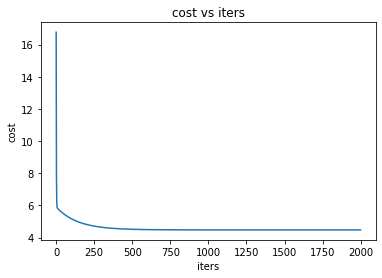

In [297]:
fig,ax = plt.subplots()#fig整个绘图的图像（画布） ax实例这里是一个
ax.plot(np.arange(iters),costs) 
ax.set(xlabel='iters',
       ylabel='cost',
       title='cost vs iters')
plt.show()

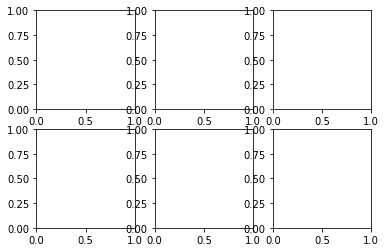

In [257]:
fig,ax = plt.subplots(2,3)#这里是2*3=6
ax1 = ax[0,0]
#ax1.plot/ax1.set
plt.show()

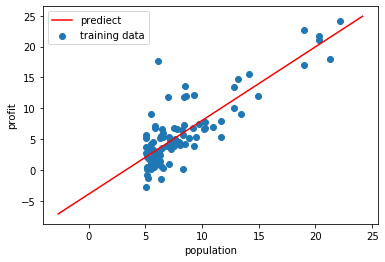

In [304]:
x=np.linspace(Y.min(),Y.max(),100)
y=theta[0,0]+theta[1,0]*x
fig,ax = plt.subplots()
ax.scatter(X[:,-1],Y,label='training data')#training data的点
ax.plot(x,y,'r',label='prediect')
ax.legend()#show label
ax.set(xlabel='population',ylabel='profit')
plt.show()